In [242]:
# Libs import
import pandas as pd
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import numpy as np
from sklearn.preprocessing import StandardScaler

In [243]:
# API Initialization
api = KaggleApi()
api.authenticate()

In [244]:
# Data Loading
path = './data'
api.dataset_download_files('nasa/kepler-exoplanet-search-results', path=path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results


In [245]:
# CSV File Detection
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    # Loading CSV Data into DataFrame
    csv_file = os.path.join(path, csv_files[0])
    df = pd.read_csv(csv_file)
    
    # Displaying Random Records
    print("Enregistrements aléatoires:")
    print(df.sample(5))
    
    # Displaying Summary Statistics
    print("\nStatistiques sommaires:")
    print(df.describe())
    
    # Save DataFrame to CSV
    df.to_csv('./data/data_pre.csv', index=False)
    print("Données enregistrées dans data")
else:
    print("Aucun fichier CSV trouvé dans le répertoire.")

Enregistrements aléatoires:
      rowid     kepid kepoi_name   kepler_name koi_disposition  \
9178   9179  11250587  K00107.01  Kepler-464 b       CONFIRMED   
8339   8340   9818732  K07233.01           NaN  FALSE POSITIVE   
8587   8588   8499922  K05525.01           NaN  FALSE POSITIVE   
1159   1160   5299459  K01576.02  Kepler-307 c       CONFIRMED   
5642   5643   3122985  K01949.01           NaN  FALSE POSITIVE   

     koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
9178        CANDIDATE      1.000              0              0              0   
8339   FALSE POSITIVE      0.000              0              1              0   
8587   FALSE POSITIVE        NaN              1              0              0   
1159        CANDIDATE      1.000              0              0              0   
5642   FALSE POSITIVE      0.349              0              1              0   

      ...  koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  \
9178  ...       

In [246]:
# Chargement des données
df = pd.read_csv('data/data_pre.csv')
df = df.drop(columns=['rowid','koi_time0bk_err1','koi_time0bk_err2', 'kepid', 'kepler_name','koi_teq_err1','koi_teq_err2','koi_time0bk','koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',])
df = df[df['koi_disposition'].notnull()].copy()
df.reset_index(drop=True, inplace=True)

# Informations initiales
print("=== Informations sur les types de données avant prétraitement ===")
print(df.info())

=== Informations sur les types de données avant prétraitement ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepoi_name         9564 non-null   object 
 1   koi_disposition    9564 non-null   object 
 2   koi_pdisposition   9564 non-null   object 
 3   koi_score          8054 non-null   float64
 4   koi_period         9564 non-null   float64
 5   koi_period_err1    9110 non-null   float64
 6   koi_period_err2    9110 non-null   float64
 7   koi_impact         9201 non-null   float64
 8   koi_impact_err1    9110 non-null   float64
 9   koi_impact_err2    9110 non-null   float64
 10  koi_duration       9564 non-null   float64
 11  koi_duration_err1  9110 non-null   float64
 12  koi_duration_err2  9110 non-null   float64
 13  koi_depth          9201 non-null   float64
 14  koi_depth_err1     9110 non-null   float64
 15  koi_de

In [247]:
# Statistiques descriptives pour les variables numériques
print("\n=== Statistiques descriptives des variables numériques ===")
print(df.select_dtypes(include=['int64', 'float64']).describe())

# Statistiques pour les variables catégorielles
print("\n=== Statistiques pour les variables catégorielles ===")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nStatistiques pour la variable '{col}' :")
    print(df[col].value_counts())
    print(f"Nombre de valeurs uniques : {df[col].nunique()}")
    print(f"Nombre de valeurs manquantes : {df[col].isnull().sum()}")


=== Statistiques descriptives des variables numériques ===
         koi_score     koi_period  koi_period_err1  koi_period_err2  \
count  8054.000000    9564.000000      9110.000000      9110.000000   
mean      0.480829      75.671358         0.002148        -0.002148   
std       0.476928    1334.744046         0.008236         0.008236   
min       0.000000       0.241843         0.000000        -0.172500   
25%       0.000000       2.733684         0.000005        -0.000276   
50%       0.334000       9.752831         0.000035        -0.000035   
75%       0.998000      40.715178         0.000276        -0.000005   
max       1.000000  129995.778400         0.172500         0.000000   

        koi_impact  koi_impact_err1  koi_impact_err2  koi_duration  \
count  9201.000000      9110.000000      9110.000000   9564.000000   
mean      0.735105         1.959861        -0.332557      5.621606   
std       3.348832         9.421653         1.249828      6.471554   
min       0.000000  

In [248]:
# Nombre de lignes avec et sans données manquantes par colonne
print("\n=== Détail des valeurs manquantes par colonne ===")
for col in df.columns:
    non_missing_count = df[col].notnull().sum()
    missing_count = df[col].isnull().sum()
    print(f"Colonne : {col}")
    print(f"  - Nombre de lignes avec données : {non_missing_count}")
    print(f"  - Nombre de lignes manquantes : {missing_count}")

print("\n=== Détail des valeurs dupliquees ===")
df.duplicated().sum()

# Suppression des colonnes avec plus de 30 % de valeurs manquantes
df = df.dropna(thresh=len(df) * 0.3, axis=1)

# === Séparer les données Candidats vs Confirmee et faux ===
df_candidates = df[df['koi_disposition'] == 'CANDIDATE'].copy()
df_confirmed_false = df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()

# Suppression des lignes avec plus de 30 % de colonnes manquantes (CORRECTIF ici)
df = df.dropna(thresh=df.shape[1] * 0.3, axis=0)

# Imputation des valeurs manquantes numériques restantes
df = df.fillna(df.mean(numeric_only=True))

# Imputation des colonnes catégorielles
for col in df.select_dtypes(include='object').columns:
    mode = df[col].mode()
    df[col] = df[col].fillna(mode[0] if not mode.empty else "missing")

# Exclusion des planètes hors température de survie humaine
df = df[(df['koi_teq'] >= 250) & (df['koi_teq'] <= 315)]

# Affichage final de la structure
print("\n=== Structure finale après nettoyage ===")
print(df.info())


=== Détail des valeurs manquantes par colonne ===
Colonne : kepoi_name
  - Nombre de lignes avec données : 9564
  - Nombre de lignes manquantes : 0
Colonne : koi_disposition
  - Nombre de lignes avec données : 9564
  - Nombre de lignes manquantes : 0
Colonne : koi_pdisposition
  - Nombre de lignes avec données : 9564
  - Nombre de lignes manquantes : 0
Colonne : koi_score
  - Nombre de lignes avec données : 8054
  - Nombre de lignes manquantes : 1510
Colonne : koi_period
  - Nombre de lignes avec données : 9564
  - Nombre de lignes manquantes : 0
Colonne : koi_period_err1
  - Nombre de lignes avec données : 9110
  - Nombre de lignes manquantes : 454
Colonne : koi_period_err2
  - Nombre de lignes avec données : 9110
  - Nombre de lignes manquantes : 454
Colonne : koi_impact
  - Nombre de lignes avec données : 9201
  - Nombre de lignes manquantes : 363
Colonne : koi_impact_err1
  - Nombre de lignes avec données : 9110
  - Nombre de lignes manquantes : 454
Colonne : koi_impact_err2
  - N

In [249]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
# === 1. Re-définir les sous-ensembles avec données nettoyées ===
df_candidates = df[df['koi_disposition'] == 'CANDIDATE'].copy()
df_confirmed_false = df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()

# === 2. Créer label binaire pour l'entraînement ===
df_confirmed_false['label'] = df_confirmed_false['koi_disposition'].map({
    'CONFIRMED': 1, 'FALSE POSITIVE': 0
})

# === 3. Features utilisées pour prédiction ===
features = ['koi_score', 'koi_period', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg']
X_train = df_confirmed_false[features]
y_train = df_confirmed_false['label']
X_candidates = df_candidates[features]

# === 4. Standardisation des données ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_candidates_scaled = scaler.transform(X_candidates)

# === 5. Entraînement du modèle Random Forest ===
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# === 6. Prédictions sur les candidats ===
pred_labels = model.predict(X_candidates_scaled)
pred_probs = model.predict_proba(X_candidates_scaled)[:, 1]

df_candidates['predicted_disposition'] = np.where(pred_labels == 1, 'CONFIRMED', 'FALSE POSITIVE')
df_candidates['probability_confirmed'] = pred_probs

# === 7. Ajout des prédictions aux données connues ===
df_confirmed_false['predicted_disposition'] = df_confirmed_false['koi_disposition']
df_confirmed_false['probability_confirmed'] = df_confirmed_false['label']

# === 8. Fusion finale ===
df_final = pd.concat([df_confirmed_false, df_candidates], ignore_index=True)
df_final.to_csv("data/kepler_all_with_predictions.csv", index=False)
print("Fichier kepler_all_with_predictions.csv enregistré.")

# === 9. Création du dossier pour les graphes ===
os.makedirs("data/plots", exist_ok=True)

Fichier kepler_all_with_predictions.csv enregistré.


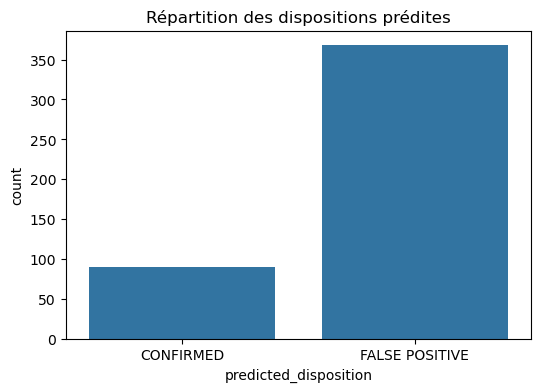

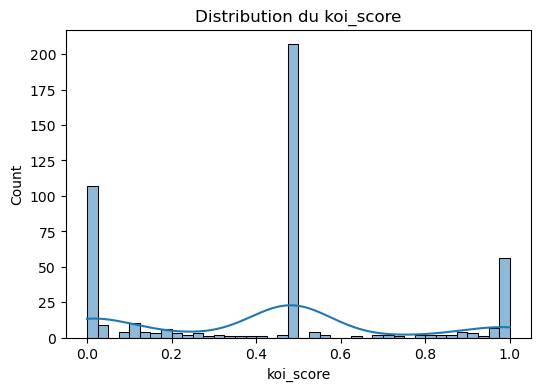

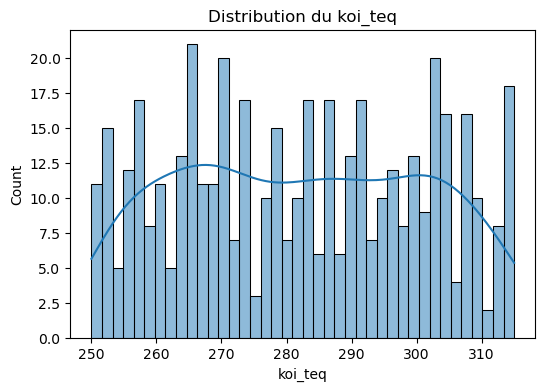

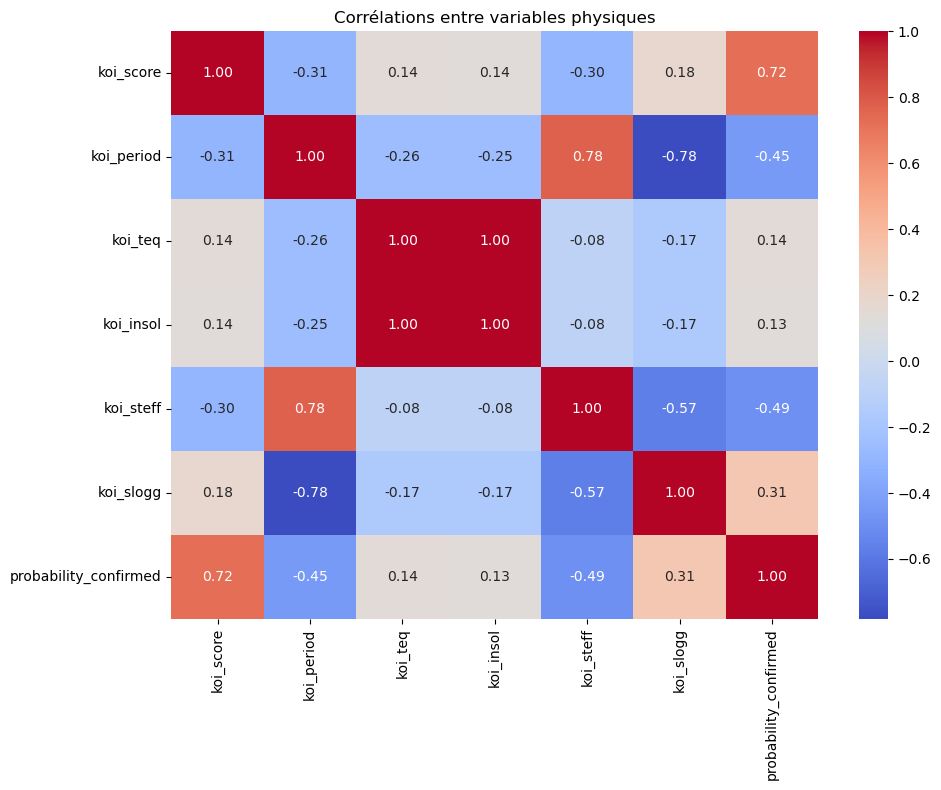

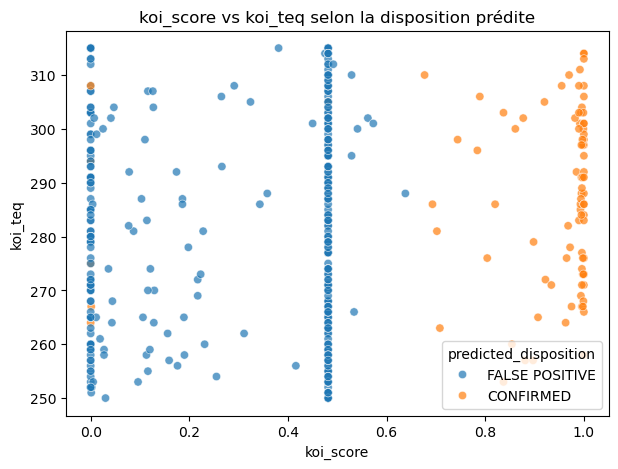

In [251]:
# === 10. Graphique : Répartition des prédictions ===
plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x='predicted_disposition', order=['CONFIRMED', 'FALSE POSITIVE'])
plt.title("Répartition des dispositions prédites")
plt.savefig("data/plots/predicted_disposition_distribution.png")
plt.show()

# === 11. Histogramme du koi_score ===
plt.figure(figsize=(6, 4))
sns.histplot(df_final['koi_score'], bins=40, kde=True)
plt.title("Distribution du koi_score")
plt.savefig("data/plots/koi_score_distribution.png")
plt.show()

# === 12. Histogramme du koi_teq ===
plt.figure(figsize=(6, 4))
sns.histplot(df_final['koi_teq'], bins=40, kde=True)
plt.title("Distribution du koi_teq")
plt.savefig("data/plots/koi_teq_distribution.png")
plt.show()

# === 13. Carte de corrélation ===
plt.figure(figsize=(10, 8))
sns.heatmap(df_final[features + ['probability_confirmed']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélations entre variables physiques")
plt.tight_layout()
plt.savefig("data/plots/correlation_heatmap.png")
plt.show()

# === 14. Scatter plot koi_score vs koi_teq ===
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_final, x='koi_score', y='koi_teq', hue='predicted_disposition', alpha=0.7)
plt.title("koi_score vs koi_teq selon la disposition prédite")
plt.savefig("data/plots/koi_score_vs_teq.png")
plt.show()

In [252]:
# === Création de la colonne koi_predispo ===
df_final['koi_predispo'] = np.where(
    df_final['koi_disposition'] == 'CANDIDATE',
    df_final['predicted_disposition'],
    df_final['koi_disposition']
)

# === Suppression des colonnes de prédiction temporaires ===
df_final_clean = df_final.drop(columns=['predicted_disposition', 'probability_confirmed'], errors='ignore')

# === Sauvegarde finale ===
df_final_clean.to_csv("data/data_post.csv", index=False)
print("Fichier final exporté sous 'data/data_post.csv' avec la colonne koi_predispo.")

Fichier final exporté sous 'data/data_post.csv' avec la colonne koi_predispo.


In [253]:
# koi_prad → Exclut planètes géantes ou erreurs
# koi_period → Trop longues/courtes = anomalies
# koi_depth → Anomalies de mesure ou objets occultants
# koi_insol → Pour exclure cas extrêmes non habitables

# === Analyse et suppression des outliers ===

# Colonnes concernées par l’analyse
cols = ['koi_prad', 'koi_period', 'koi_depth', 'koi_insol', 'koi_score']

# DataFrame d'origine à filtrer
df_check = df_final_clean.copy()
initial_rows = df_check.shape[0]

# Création d'un masque général (valeurs à conserver)
mask = pd.Series(True, index=df_check.index)

print("\n=== Détection et suppression des outliers (IQR) ===")

for col in cols:
    print(f"\n==== Analyse des outliers pour: {col} ====")
    
    Q1 = df_check[col].quantile(0.25)
    Q3 = df_check[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df_check[col] < lower_bound) | (df_check[col] > upper_bound)
    valid = ~outliers
    mask &= valid  # mise à jour du masque global
    
    print(f" Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f" Bornes : [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f" Nombre d'outliers détectés : {outliers.sum()}")
    print(f" Nombre de valeurs clean : {valid.sum()}")

    print("\nExemples d'outliers détectés :")
    print(df_check.loc[outliers, [col, 'koi_predispo']].head())

# === Application du filtre global ===
df_filtered = df_check[mask].copy()
print(f"\n Total des lignes supprimées : {initial_rows - df_filtered.shape[0]}")
print(f" Lignes restantes : {df_filtered.shape[0]}")

# === Export du fichier nettoyé ===
df_filtered.to_csv("data/data_post_filtered.csv", index=False)
print("Fichier nettoyé exporté sous : data/data_post_filtered.csv")



=== Détection et suppression des outliers (IQR) ===

==== Analyse des outliers pour: koi_prad ====
 Q1: 1.87, Q3: 3.60, IQR: 1.73
 Bornes : [-0.73, 6.20]
 Nombre d'outliers détectés : 77
 Nombre de valeurs clean : 381

Exemples d'outliers détectés :
   koi_prad    koi_predispo
0     41.50  FALSE POSITIVE
2      8.90       CONFIRMED
3     29.55  FALSE POSITIVE
4     38.98  FALSE POSITIVE
7     10.05  FALSE POSITIVE

==== Analyse des outliers pour: koi_period ====
 Q1: 190.14, Q3: 373.75, IQR: 183.61
 Bornes : [-85.28, 649.17]
 Nombre d'outliers détectés : 2
 Nombre de valeurs clean : 456

Exemples d'outliers détectés :
      koi_period    koi_predispo
13   1064.268096  FALSE POSITIVE
164   681.017560  FALSE POSITIVE

==== Analyse des outliers pour: koi_depth ====
 Q1: 340.55, Q3: 1431.03, IQR: 1090.48
 Bornes : [-1295.16, 3066.74]
 Nombre d'outliers détectés : 61
 Nombre de valeurs clean : 397

Exemples d'outliers détectés :
    koi_depth    koi_predispo
0     24927.0  FALSE POSITIVE
2

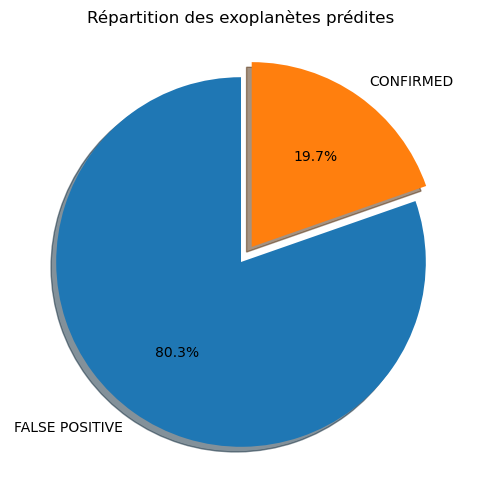

In [254]:
# explose uniquement la classe CONFIRMED

df_final['koi_predispo'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.1 if label == 'CONFIRMED' else 0 for label in df_final['koi_predispo'].value_counts().index],
    shadow=True,
    figsize=(6, 6)
)
plt.title("Répartition des exoplanètes prédites")
plt.ylabel("")
plt.show()


In [255]:
#Predictors

def extract_predictors(df, target_col='koi_predispo', threshold_target=0.05, multicollinearity_threshold=0.3):
    """
    Sélectionne les meilleurs prédicteurs numériques, indépendants les uns des autres
    et corrélés à la variable cible. Affiche et retourne les variables sélectionnées.
    """
    if df[target_col].dtype == 'object':
        df = df.copy()
        df[target_col] = df[target_col].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})

    # Ne garder que les colonnes numériques
    numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])

    # Calcul de la matrice de corrélation
    corr_matrix = numeric_df.corr()

    # Tri des prédicteurs par corrélation avec la cible
    predictors = [col for col in corr_matrix.columns if col != target_col]
    target_corrs = [(pred, abs(corr_matrix[target_col][pred])) for pred in predictors]
    target_corrs = [t for t in target_corrs if t[1] >= threshold_target]
    sorted_predictors = sorted(target_corrs, key=lambda x: x[1], reverse=True)

    # Sélection des prédicteurs sans multicolinéarité
    selected_predictors = []
    print(f"\n Analyse des prédicteurs (seuil de corrélation = {threshold_target}, multicolinéarité max = {multicollinearity_threshold})\n")
    for predictor, target_corr in sorted_predictors:
        is_independent = True
        for selected in selected_predictors:
            corr_with_selected = abs(corr_matrix[predictor][selected])
            if corr_with_selected > multicollinearity_threshold:
                print(f" {predictor} éliminé (corrélation avec {selected} = {corr_with_selected:.2f})")
                is_independent = False
                break
        if is_independent:
            selected_predictors.append(predictor)
            print(f" {predictor} retenu (corrélation avec la cible = {target_corr:.2f})")

    print(f"\n Prédicteurs finaux sélectionnés ({len(selected_predictors)}):")
    for pred in selected_predictors:
        print(f" - {pred}")

    return selected_predictors

In [256]:
selected_predictors = extract_predictors(df_final_clean, target_col='koi_predispo')
X = df_final_clean[selected_predictors]
y = df_final_clean['koi_predispo'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})


 Analyse des prédicteurs (seuil de corrélation = 0.05, multicolinéarité max = 0.3)

 label retenu (corrélation avec la cible = 1.00)
 koi_score éliminé (corrélation avec label = 0.66)
 koi_steff_err1 éliminé (corrélation avec label = 0.56)
 koi_steff_err2 éliminé (corrélation avec label = 0.52)
 koi_steff éliminé (corrélation avec label = 0.52)
 koi_slogg_err2 éliminé (corrélation avec label = 0.47)
 koi_period éliminé (corrélation avec label = 0.44)
 koi_srad_err1 éliminé (corrélation avec label = 0.42)
 koi_srad éliminé (corrélation avec label = 0.35)
 koi_duration_err1 éliminé (corrélation avec label = 0.32)
 koi_duration_err2 éliminé (corrélation avec label = 0.32)
 koi_slogg éliminé (corrélation avec label = 0.33)
 koi_period_err1 retenu (corrélation avec la cible = 0.29)
 koi_period_err2 éliminé (corrélation avec koi_period_err1 = 1.00)
 koi_srad_err2 retenu (corrélation avec la cible = 0.20)
 koi_duration éliminé (corrélation avec koi_period_err1 = 0.30)
 koi_insol_err1 retenu 

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# === Séparer les données en train/test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Entraînement du modèle ===
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# === Prédiction sur le test set ===
y_pred = model.predict(X_test)

# === Évaluation ===
print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Rapport de classification ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.94      0.85      0.89        20

    accuracy                           0.96        92
   macro avg       0.95      0.92      0.93        92
weighted avg       0.96      0.96      0.96        92

=== Matrice de confusion ===
[[71  1]
 [ 3 17]]


In [258]:
from sklearn.preprocessing import MinMaxScaler

# Liste finale à normaliser
predictors_to_normalize = [
    'koi_period_err1', 'koi_srad_err2', 'koi_insol_err1',
    'koi_tce_plnt_num', 'koi_teq', 'ra', 'koi_depth', 'dec'
]

# Vérifie leur présence
existing_cols = [col for col in predictors_to_normalize if col in df.columns]

# Appliquer MinMaxScaler
scaler = MinMaxScaler()
df[existing_cols] = scaler.fit_transform(df[existing_cols])

print("Prédicteurs normalisés avec MinMaxScaler :", existing_cols)

Prédicteurs normalisés avec MinMaxScaler : ['koi_period_err1', 'koi_srad_err2', 'koi_insol_err1', 'koi_tce_plnt_num', 'koi_teq', 'ra', 'koi_depth', 'dec']


In [259]:
print(df.sample(5))

     kepoi_name koi_disposition koi_pdisposition  koi_score  koi_period  \
9255  K08110.01  FALSE POSITIVE   FALSE POSITIVE   0.043000  375.177370   
5722  K04016.01       CONFIRMED        CANDIDATE   1.000000  125.413230   
86    K00812.03       CONFIRMED        CANDIDATE   1.000000   46.184204   
9015  K08217.01  FALSE POSITIVE   FALSE POSITIVE   0.000000  277.251180   
6457  K05689.01       CANDIDATE        CANDIDATE   0.481394  114.127160   

      koi_period_err1  koi_period_err2  koi_impact  koi_impact_err1  \
9255         0.114687        -0.016610      0.4050           0.0550   
5722         0.002664        -0.000389      0.8220           0.0570   
86           0.001807        -0.000265      0.0130           0.4150   
9015         0.087615        -0.012690      0.9320           0.0290   
6457         0.011301        -0.001640      0.7092           0.2727   

      koi_impact_err2  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
9255          -0.4050  ...          -257.0      4

In [260]:
print("Any NaNs left? ", df.isnull().any().any())  # Should be False

Any NaNs left?  False


In [261]:
# Imputation des valeurs manquantes numériques restantes
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
original_nan_counts_num = df[num_cols].isnull().sum().sum()

df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])
new_nan_counts_num = df[num_cols].isnull().sum().sum()

# Imputation des colonnes catégorielles
cat_cols = df.select_dtypes(include='object').columns
original_nan_counts_cat = df[cat_cols].isnull().sum().sum()

df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])
new_nan_counts_cat = df[cat_cols].isnull().sum().sum()

# Print result
print(f"Numerical missing values imputed: {original_nan_counts_num - new_nan_counts_num}")
print(f"Categorical missing values imputed: {original_nan_counts_cat - new_nan_counts_cat}")
print(f"Total missing values remaining: {df.isnull().sum().sum()}")

Numerical missing values imputed: 0
Categorical missing values imputed: 0
Total missing values remaining: 0


In [262]:
print(X.head())  # View the first few rows
print(X.info())  # View the structure of X
print(X.describe())  # View summary statistics of X

   label  koi_period_err1  koi_srad_err2  koi_insol_err1  koi_tce_plnt_num  \
0    0.0         0.000137         -0.064            0.26               1.0   
1    1.0         0.000265         -0.040            0.29               3.0   
2    1.0         0.000235         -0.037            0.59               2.0   
3    0.0         0.000471         -0.066            0.85               1.0   
4    0.0         0.001502         -0.251            1.35               1.0   

   koi_teq         ra  koi_depth        dec  
0    297.0  292.27374    24927.0  37.671558  
1    273.0  286.07913     1394.7  39.278320  
2    308.0  285.28363    10566.0  38.947281  
3    313.0  284.51962     5450.0  44.453941  
4    296.0  291.69672    18904.0  37.238041  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             333 non-null    float64
 1   koi_p

In [263]:
X = df_final_clean[selected_predictors]
print(X.head()) 

   label  koi_period_err1  koi_srad_err2  koi_insol_err1  koi_tce_plnt_num  \
0    0.0         0.000137         -0.064            0.26               1.0   
1    1.0         0.000265         -0.040            0.29               3.0   
2    1.0         0.000235         -0.037            0.59               2.0   
3    0.0         0.000471         -0.066            0.85               1.0   
4    0.0         0.001502         -0.251            1.35               1.0   

   koi_teq         ra  koi_depth        dec  
0    297.0  292.27374    24927.0  37.671558  
1    273.0  286.07913     1394.7  39.278320  
2    308.0  285.28363    10566.0  38.947281  
3    313.0  284.51962     5450.0  44.453941  
4    296.0  291.69672    18904.0  37.238041  


In [266]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Liste des colonnes prédicteurs
predictors = ['koi_period_err1', 'koi_srad_err2', 'koi_insol_err1',
              'koi_tce_plnt_num', 'koi_teq', 'ra', 'koi_depth', 'dec']
print (predictors)
# Filtrage des colonnes présentes
existing_cols = [col for col in predictors if col in df.columns]
X = df[existing_cols]
print (X)
# Détection de la bonne colonne cible
# Nettoyage de y et X (on ne garde que les lignes avec y non nul)
if 'koi_predispo' in df.columns:
    df = df[df['koi_predispo'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()
    y = df['koi_predispo'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})
elif 'koi_disposition' in df.columns:
    df = df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()
    y = df['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})
elif 'label' in df.columns:
    df = df[df['label'].notnull()].copy()
    y = df['label']
else:
    raise KeyError("Colonne cible introuvable : koi_predispo, koi_disposition ou label.")


# Définir les modèles
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Lancer les modèles via un pipeline avec imputation
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),     # Imputation NaN
        ('scaler', MinMaxScaler()),                         # Normalisation
        ('classifier', model)                               # Modèle
    ])
    try:
        scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
        results[name] = {
            "Mean Accuracy": scores.mean(),
            "Std Dev": scores.std()
        }
    except Exception as e:
        results[name] = {"Mean Accuracy": None, "Error": str(e)}

# Résultats finaux
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Mean Accuracy", ascending=False)

print("\n Résultats avec pipeline triés (du plus au moins précis) :")
print(results_df)


['koi_period_err1', 'koi_srad_err2', 'koi_insol_err1', 'koi_tce_plnt_num', 'koi_teq', 'ra', 'koi_depth', 'dec']
      koi_period_err1  koi_srad_err2  koi_insol_err1  koi_tce_plnt_num  \
24           0.000920       0.960836        0.005204          0.000000   
86           0.001807       0.981723        0.005805          0.333333   
96           0.001596       0.984334        0.011809          0.166667   
489          0.003226       0.959095        0.017014          0.000000   
524          0.010348       0.798085        0.027022          0.000000   
...               ...            ...             ...               ...   
9500         0.014808       0.953873        0.015212          0.000000   
9502         0.149426       0.873803        0.022818          0.000000   
9535         0.164274       0.887728        0.020416          0.000000   
9545         0.075874       0.998259        0.005805          0.000000   
9554         0.020286       0.960836        0.008006          0.166667   


In [268]:
# Création d’un jeu de données final prêt à l’analyse ou au déploiement
df_final = df.copy()
df_final.to_csv("data/data_final.csv", index=False)
print("\n data_final.csv généré avec succès.")


 data_final.csv généré avec succès.
